### Autoencoder
### Type of artificial neural network used for unsupervised learning. Autoencoders are designed to learn efficient codings of input data, typically for the purpose of dimensionality reduction or feature extraction.

### Objectives

- **Dimensionality Reduction**: Reduce the number of features in the dataset while preserving important information.
- **Feature Learning**: Automatically learn useful features from the input data.
- **Anomaly Detection**: Identify unusual patterns that do not conform to expected behavior.

### Components

- **Encoder**: Compresses the input data into a lower-dimensional representation.
- **Latent Space**: The compressed representation of the input data.
- **Decoder**: Reconstructs the input data from the lower-dimensional representation.

### Applications

- **Data Compression**: Reducing the size of data for storage and transmission.
- **Denoising**: Removing noise from data.
- **Image Processing**: Enhancing and reconstructing images.
- **Clustering**: Grouping similar data points together based on learned features.

### Implementation Steps

1. **Data Preprocessing**: Prepare the dataset for training.
2. **Model Architecture**: Define the encoder and decoder neural network layers.
3. **Training**: Train the autoencoder on the dataset.
4. **Evaluation**: Assess the performance of the autoencoder.
5. **Visualization**: Visualize the results, such as the reconstructed data and latent space.


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.datasets import mnist
import numpy as np
import os

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


input_img = Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Flatten()(x)
# Add a bottleneck layer with 2 neurons
encoded = layers.Dense(2, activation='relu')(x)

# Reshape back to the shape before flattening
x = layers.Dense(4 * 4 * 8, activation='relu')(encoded)
x = layers.Reshape((4, 4, 8))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


# Check if model weights are available and load them

weights_path = 'mnist_autoencoder.h5'
if os.path.exists(weights_path):
    autoencoder.load_weights(weights_path)


# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))



Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 0.2021 - val_loss: 0.1965
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.1962 - val_loss: 0.1974
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.1966 - val_loss: 0.1952
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.1951 - val_loss: 0.1951
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.1946 - val_loss: 0.1948
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.1943 - val_loss: 0.1941
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.1942 - val_loss: 0.1934
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.1930 - val_loss: 0.1943
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.1936 - val_loss: 0.1931
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.1929 - val_loss: 0.1928


In [5]:
# Save the model
autoencoder.save('mnist_autoencoder.h5')

# Create the encoder model
encoder = models.Model(inputs=input_img, outputs=encoded)
encoder.save('mnist_encoder.h5')

# Create the decoder model

encoded_input = Input(shape=(2,))
x = encoded_input
for layer in autoencoder.layers[-9:]:
    x = layer(x)
decoder = models.Model(inputs=encoded_input, outputs=x)
decoder.save('mnist_decoder.h5')

In [6]:
from tensorflow.keras.models import load_model


# Load the autoencoder model
autoencoder = load_model('mnist_autoencoder.h5')
encoder = load_model('mnist_encoder.h5')
decoder = load_model('mnist_decoder.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


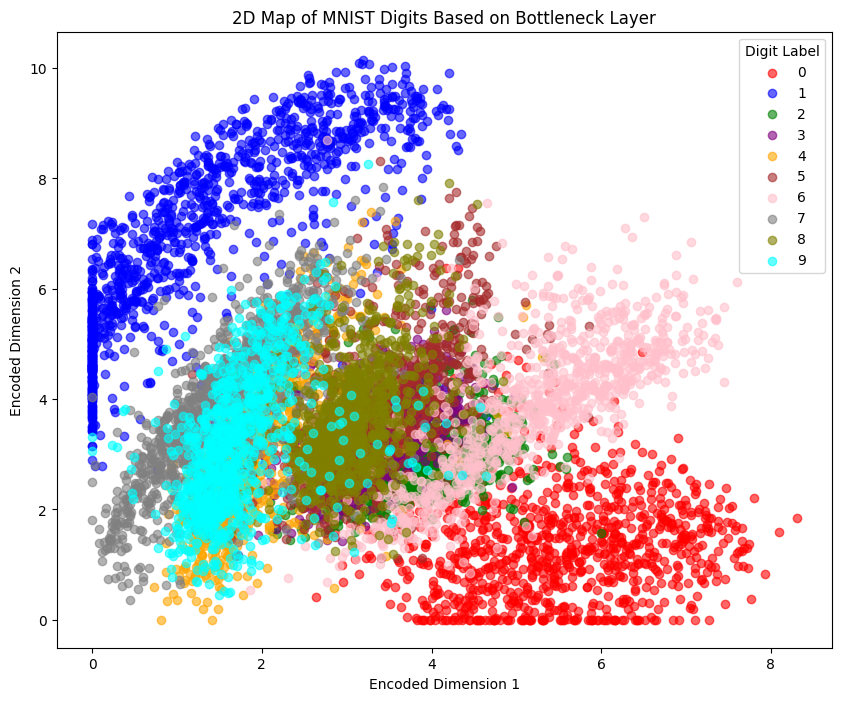

In [7]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Load the MNIST dataset with labels
(_, y_train), (_, y_test) = mnist.load_data()

# Encode the test data
encoded_imgs = encoder.predict(x_test)

# Define colors for each digit class
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Plot the encoded values in a 2D scatter plot
plt.figure(figsize=(10, 8))
for digit in range(10):
    indices = np.where(y_test == digit)
    plt.scatter(encoded_imgs[indices, 0], encoded_imgs[indices, 1], c=colors[digit], label=str(digit), alpha=0.6)

plt.xlabel('Encoded Dimension 1')
plt.ylabel('Encoded Dimension 2')
plt.title('2D Map of MNIST Digits Based on Bottleneck Layer')
plt.legend(title='Digit Label')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


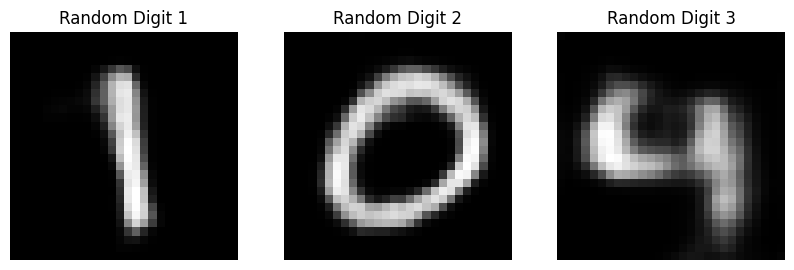

In [8]:
import matplotlib.pyplot as plt

# Generate 3 random encoded vectors
random_encoded_vectors = [[0.1, 4],[6,0],[1,0]]

# Convert the list to a NumPy array
random_encoded_vectors = np.array(random_encoded_vectors)

# Decode the random vectors
decoded_imgs = decoder.predict(random_encoded_vectors)

# Plot the decoded images
plt.figure(figsize=(10, 4))
for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title(f'Random Digit {i+1}')
    plt.axis('off')
plt.show()

In [9]:
import numpy as np
from ipywidgets import FloatSlider, interactive, HBox, VBox
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

# Load the MNIST dataset with labels
(_, y_train), (_, y_test) = mnist.load_data()

# Encode the test data
encoded_imgs = encoder.predict(x_test)

# Define colors for each digit class
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Function to update the plot
def update_plot(x, y):
    plt.figure(figsize=(12, 6))
    
    # Plot the encoded values in a 2D scatter plot
    plt.subplot(1, 2, 1)
    for digit in range(10):
        indices = np.where(y_test == digit)
        plt.scatter(encoded_imgs[indices, 0], encoded_imgs[indices, 1], c=colors[digit], label=str(digit), alpha=0.6)
    plt.scatter(x, y, c='black', marker='x', s=100)  # Cursor position
    plt.xlabel('Encoded Dimension 1')
    plt.ylabel('Encoded Dimension 2')
    plt.title('2D Map of MNIST Digits Based on Bottleneck Layer')
    plt.legend(title='Digit Label')
    
    # Decode the cursor position
    decoded_img = decoder.predict(np.array([[x, y]]))
    
    # Plot the decoded image
    plt.subplot(1, 2, 2)
    plt.imshow(decoded_img[0].reshape(28, 28), cmap='gray')
    plt.title('Decoded Image')
    plt.axis('off')
    
    plt.show()

# Create sliders for x and y coordinates
x_slider = FloatSlider(min=-10, max=10, step=0.1, description='x')
y_slider = FloatSlider(min=-10, max=10, step=0.1, description='y')

# Create interactive plot
interactive_plot = interactive(update_plot, x=x_slider, y=y_slider)
display(HBox([interactive_plot.children[0], interactive_plot.children[1]]), interactive_plot.children[2])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Output()

In [14]:
import numpy as np
from ipywidgets import FloatSlider, interactive, HBox, VBox
import matplotlib.pyplot as plt

# Function to update the plot
def update_plot(x, y):
    plt.figure(figsize=(12, 6))
    
    # Plot the encoded values in a 2D scatter plot
    plt.subplot(1, 2, 1)
    for digit in range(10):
        indices = np.where(y_test == digit)
        plt.scatter(encoded_imgs[indices, 0], encoded_imgs[indices, 1], c=colors[digit], label=str(digit), alpha=0.6)
    plt.scatter(x, y, c='black', marker='x', s=100)  # Cursor position
    plt.xlabel('Encoded Dimension 1')
    plt.ylabel('Encoded Dimension 2')
    plt.title('2D Map of MNIST Digits Based on Bottleneck Layer')
    plt.legend(title='Digit Label')
    
    # Decode the cursor position
    decoded_img = decoder.predict(np.array([[x, y]]))
    
    # Plot the decoded image
    plt.subplot(1, 2, 2)
    plt.imshow(decoded_img[0].reshape(28, 28), cmap='gray')
    plt.title('Decoded Image')
    plt.axis('off')
    
    plt.show()

# Create sliders for x and y coordinates
x_slider = FloatSlider(min=-10, max=10, step=0.1, description='x')
y_slider = FloatSlider(min=-10, max=10, step=0.1, description='y')

# Create interactive plot
interactive_plot = interactive(update_plot, x=x_slider, y=y_slider)
display(HBox([interactive_plot.children[0], interactive_plot.children[1]]), interactive_plot.children[2])


Output()